## Pneumonia Classification EDA

In [477]:
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
from keras.preprocessing import image

This section of eda manipulations were inspired by the blog post :  https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2

In [478]:
train = 'image_classification/chest_xray/train'

normal = [img for img in os.listdir(f'{train}/NORMAL')]

bacteria = [img for img in os.listdir(f'{train}/PNEUMONIA') if img.find('bacteria') != -1]

viral = [img for img in os.listdir(f'{train}/PNEUMONIA') if img.find('virus') != -1]

sel_norm = np.random.choice(normal, 3, replace = False)
sel_bacteria = np.random.choice(bacteria, 3, replace = False)
sel_viral = np.random.choice(viral, 3, replace = False)



#### displaying images of three randomly selected images representing the three categories:  normal, bacterial pneumonia, and virl pneumonia.

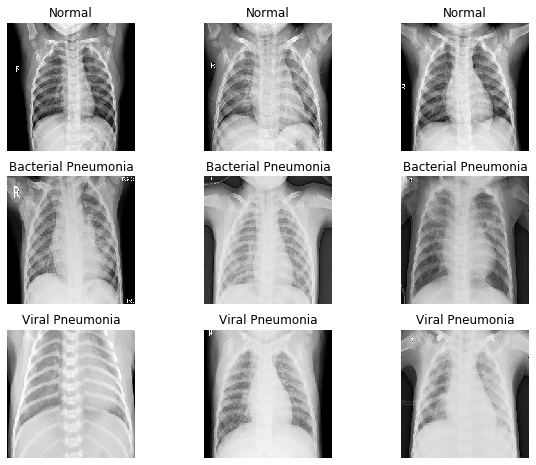

In [539]:
fig = plt.figure(figsize = (10,8))
for i in range(9):
    if i < 3:
        lungs = f'{train}/NORMAL/{sel_norm[i]}'
        label = 'Normal'
    elif i > 2 and i < 6:
        lungs = f'{train}/PNEUMONIA/{sel_bacteria[i-3]}'
        label = 'Bacterial Pneumonia'
    else:
        lungs = f'{train}/PNEUMONIA/{sel_viral[i-7]}'
        label = 'Viral Pneumonia'
    ax = fig.add_subplot(3,3, i+1)
        
    img = image.load_img(lungs, target_size = (200,200), color_mode = 'grayscale')
    plt.imshow(img, cmap = 'Greys_r')
    plt.title(label)
    plt.axis('off')
    fig.savefig('lungs.png', bbox_inches='tight')
plt.show()

#### From the preceding images it is apparent that effects of the infection result in more white in the image.  Below is an example of bacterial pneumonia

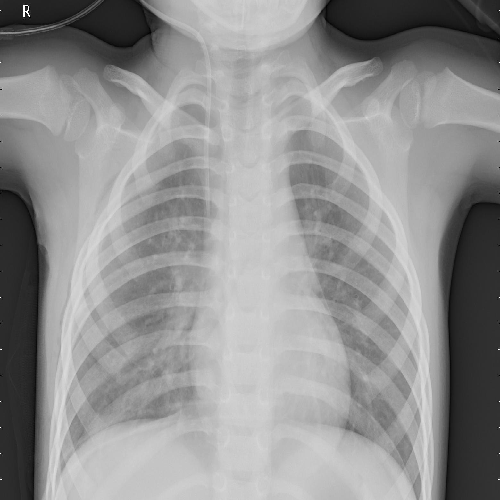

In [480]:
pneumonia = f'{train}/PNEUMONIA/{sel_bacteria[1]}'
pneumonia_load = image.load_img(pneumonia, target_size = (500,500),  color_mode = 'grayscale')
pneumonia_load

#### The preceding images suggest an approach to identifying pneumonia.  Being able to quantify the amount of white in the image may help to identify pathology

In [481]:
def avg_grayscale(x):
    '''calculates the average amount of white in an image'''
    width, height = x.size  #  finds the number of pixels in the image
    
    total = 0
    for i in range(0, width):
        for j in range(0, height):
            total += x.getpixel((i,j))
            
    # gets the grayscale value of each pixel and sums it into 'total' var
    
    white_avg = total/(width*height) 
    return white_avg
        
    

#### tests the function on an image of lungs with no pneumonia

The average amount of white per pixel in the following photo is 102.643475


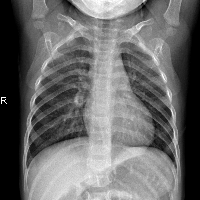

In [534]:
a_normal = f'{train}/NORMAL/{sel_norm[0]}'
a_normal_img = image.load_img(img_1, target_size = (200,200),  color_mode = 'grayscale')
#avg_grayscale(normal_img)


print(f'The average amount of white per pixel in the following photo is {avg_grayscale(im_1)}')
a_normal_img


#### A similiar experiminet with a lung infected with bacterial pneumonia.  The average amount of white in the image is greater for the infected lung, but not by as much as expected

The average amount of white per pixel in the following photo is 108.71265


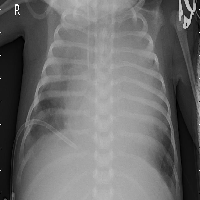

In [536]:
a_bacterial = f'{train}/PNEUMONIA/{sel_bacteria[0]}'
a_bacterial_img = image.load_img(img_2,target_size = (200,200), color_mode = 'grayscale')

#print(avg_grayscale(im_2))

print(f'The average amount of white per pixel in the following photo is {avg_grayscale(im_2)}')
a_bacterial_img


#### Same experiment as above but with viral pneumonia

The average amount of white per pixel in the following photo is 129.4408


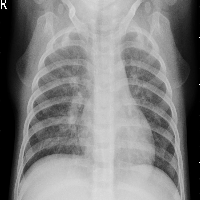

In [538]:

a_viral = f'{train}/PNEUMONIA/{sel_viral[0]}'
a_viral_img = image.load_img(img_3,target_size = (200,200),color_mode = 'grayscale')

print(f'The average amount of white per pixel in the following photo is {avg_grayscale(im_3)}')
a_viral_img


#### The above result is encouraging as the image has more white and is scoring higher on the grayscale metric, but the results are not as pronounced as hoped.  

#### Getting the average grayscale of the first 500 samples of normal lungs.  I am limiting the samples in the following examples the reduce the amount of time to compute.  

In [485]:
len(normal)

1342

In [486]:

norm_tot = 0
norm_list = []
for i in range(500):
    img_norm = f'{train}/NORMAL/{normal[i]}'
    im_norm = image.load_img(img_norm ,target_size = (200,200),color_mode = 'grayscale')
    n = avg_grayscale(im_norm)
    norm_tot += n
    norm_list.append(n)

    
avg_norm_gray = round(norm_tot/500, 2)

print(f'norm mean is {avg_norm_gray} and the total of first 500 x-rays is {round(norm_tot, 2)}')

normal_std = round(st.stdev(norm_list), 2)

print(f'the standard deviation is {normal_std}')


norm mean is 121.95 and the total of first 500 x-rays is 60975.84
the standard deviation is 12.97


In [487]:
len(norm_list)

500

#### Average amount of white in x-rays of lungs infected with bacterial pneumonia

In [489]:

#bact_tot = 0
bact_list = []
for i in range(500):
    img_bacts = f'{train}/PNEUMONIA/{bacteria[i]}'
    im_bacts = image.load_img(img_bacts ,target_size = (200,200),color_mode = 'grayscale')
    b = avg_grayscale(im_bacts)
    #bact_tot += b
    bact_list.append(b)

  
    
    
avg_bact_gray = round(sum(bact_list)/500, 2)
    
print(f'the average amount of white per pixel in the first 500 is {avg_bact_gray} and the total {round(sum(bact_list), 2)}')

#bact_avg = round(bact_tot/500, 2)
#normal_std = round(st.stdev(norm_list), 2)

#print(f'mean of normal x-rays is {normal_avg} and the standard deviation is {normal_std}')


the average amount of white per pixel in the first 500 is 122.03 and the total 61013.47


#### Same procedure for calculating amount of white in lungs infected with viral pneumonia

In [490]:

#viral_tot = 0
vir_list = []
for i in range(500):
    img_virals = f'{train}/PNEUMONIA/{viral[i]}'
    im_virals = image.load_img(img_virals ,target_size = (200,200),color_mode = 'grayscale')
    v = avg_grayscale(im_virals)
    #viral_tot += v
    vir_list.append(v)
    
avg_vir_gray = round(sum(vir_list)/500, 2)

print(f'viral total white space in the first 500 x-rays is {avg_vir_gray} and the total is {round(sum(vir_list), 2)}')

viral total white space in the first 500 x-rays is 125.1 and the total is 62549.17


In [491]:
len(vir_list)

500

#### Creating a histogram with the lists of the amount of white space generated above to visually compare the amount of whitespace in x-rays across pathology types.

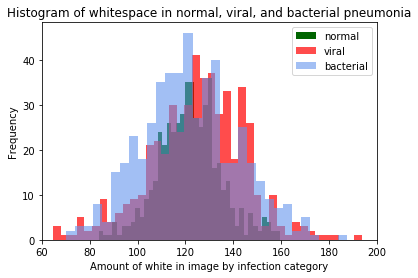

In [530]:


#plt.hist(grayscale_lists, bins = 50, stacked = True)
plt.hist(norm_list, alpha=1, bins=40, color='darkgreen')
plt.hist(vir_list, alpha=0.7, bins=40, color='red')
plt.hist(bact_list, alpha=0.6, bins=40, color='cornflowerblue')

plt.xlabel('Amount of white in image by infection category')
plt.ylabel('Frequency')
plt.title('Histogram of whitespace in normal, viral, and bacterial pneumonia')
label_list = [ 'normal','viral', 'bacterial', ]
plt.xlim(60,200)
plt.legend(loc = 'upper right', labels = label_list)
plt.savefig('pneumonia_hist')

plt.show()

#### While there are differences in distribution of white space in the amount of whitespace in the images the differences are not as prounounced as expected.  It appears that bacterial pneumonia produces a distribution with greater variance while viral pneumonia has a slightly rightward shifted mean.  Normal lungs have the tightest grouping in the histogram.  I would speculate from these observations that to try and build a model to distinguish a pneumonia infection from non-infection could not rely on average color and must instead read deeper into the image to recognize features and color gradations on specific locations in the image like the thoracic cavity.  I would be curious to know how well a non-nueral network approach could do if the region of the image outside the rib cage were ignored.  My guess is that performance would be significantly improved.

In [494]:
normal_avg = round(sum(norm_list)/500, 2)
normal_std = round(st.stdev(norm_list), 2)

print(f'mean of normal x-rays is {normal_avg} and the standard deviation is {normal_std}')


mean of normal x-rays is 121.95 and the standard deviation is 12.97


#### looking at the image of outliers. This image appears to be corrupted and does not represent a usefull reflection of pnuemonia pathology

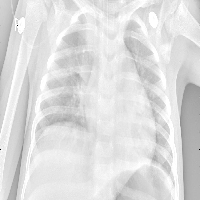

In [495]:

bact_max = max(bact_list)
bact_list.index(bact_max)


img_bact_max = f'{train}/PNEUMONIA/{bacteria[445]}'
im_bact_max = image.load_img(img_bact_max ,target_size = (200,200),color_mode = 'grayscale')
im_bact_max



#### what the median chest x-ray looks like with no pnuemonia pathonlogy

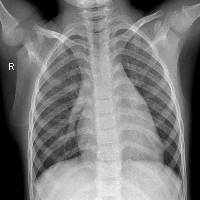

In [496]:
sorted_normal = sorted(norm_list, reverse = True)
normal_lungs = sorted_normal[250]

normal_lungs_loc = norm_list.index(sorted_normal[250])

normal_lungs_loc

img_normal_lungs = f'{train}/NORMAL/{normal[382]}'
im_normal_lungs = image.load_img(img_normal_lungs ,target_size = (200,200),color_mode = 'grayscale')
im_normal_lungs

#### Finding a picture of a bad case of bacterial pneumonia

In [497]:
sorted_bact = sorted(bact_list, reverse = True)

bad_bact_pnuemonia = bact_list.index(sorted_bact[4])
bad_bact_pnuemonia

380

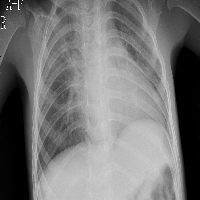

In [498]:
img_bad_bact_pneumonia = f'{train}/PNEUMONIA/{viral[380]}'
im_bad_bact_pneumonia = image.load_img(img_bad_bact_pneumonia ,target_size = (200,200),color_mode = 'grayscale')
im_bad_bact_pneumonia

#### looking at viral outlier.  This image appears to be sound and reflects a bad case of viral pneumonia

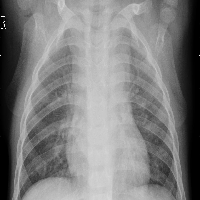

In [499]:
vir_max = max(vir_list)
vir_list.index(vir_max)


img_vir_max = f'{train}/PNEUMONIA/{viral[445]}'
im_vir_max = image.load_img(img_vir_max ,target_size = (200,200),color_mode = 'grayscale')
im_vir_max


#### The result this exploration was dissapionting.  While there were modest differences in whitespace along the lines i expected, the differences among the disease categories was not as pronounced as hypothesized.  I still would speculate that whitespace is one of the critical characteristics being considered by the network.  

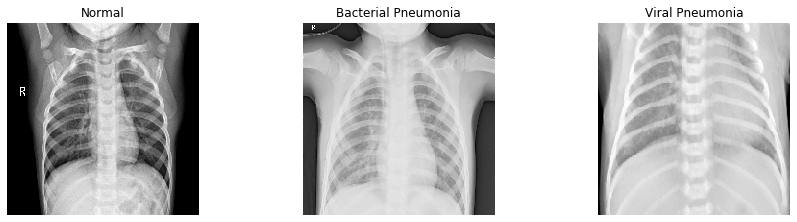

In [540]:
fig = plt.figure(figsize = (15,12))
for i in range(3):
    if i ==0:
        lungs = f'{train}/NORMAL/{sel_norm[0]}'
        label = 'Normal'
    elif i==1:
        lungs = f'{train}/PNEUMONIA/{sel_bacteria[1]}'
        label = 'Bacterial Pneumonia'
    else:
        lungs = f'{train}/PNEUMONIA/{sel_viral[2]}'
        label = 'Viral Pneumonia'
    ax = fig.add_subplot(3,3, i+1)
        
    img = image.load_img(lungs, target_size = (200,200), color_mode = 'grayscale')
    plt.imshow(img, cmap = 'Greys_r')
    plt.title(label)
    plt.axis('off')
    fig.savefig('lungs.png', bbox_inches='tight')
plt.show()